In [29]:
import numpy as np
import matplotlib.pyplot as plt
import functools

In [30]:
# Simulation settings
dtime = 0.001 # time step in seconds
iterative = True
ideal_diodes = False

# Other
diode_volt_drop = 0 if ideal_diodes else 0.7

# Capacitor
has_capacitor = True
capacitance = 1e-4 # farads
#phase = np.pi / 2 # 90 degrees, TODO: change to calculate based on resistance

# Zener diode
has_zener = True
zener_voltage = 9

# Resistor
resistance = 800 # ohm

# Source
frequency = 60 # hertz
voltage = 12 # volts
current_volt = lambda t: np.sin(2*np.pi*t*frequency) * voltage # function given time in seconds

# Rectifiers

# False is single diode, True is diode bridge
diode_bridge = True

if diode_bridge:
    rect_volt = lambda volt: np.abs(volt) if ideal_diodes else max(np.abs(volt) - 2*diode_volt_drop, 0)
else:
    rect_volt = lambda volt: max(volt, 0) if ideal_diodes else max(volt - diode_volt_drop, 0)

if has_zener:
    def limited_volt(volt): # disconsiders negative voltage
        if volt > zener_voltage:
            return zener_voltage
        else:
            return volt
else:
    limited_volt = lambda volt: volt

In [31]:
# Calculating functions
@functools.cache
def charge_capacitor(time_step, current_charge, applied_volt):
    time_const = capacitance * resistance
    
    next_charge = applied_volt + (current_charge - applied_volt) * np.exp(-time_step/time_const)
    
    return next_charge

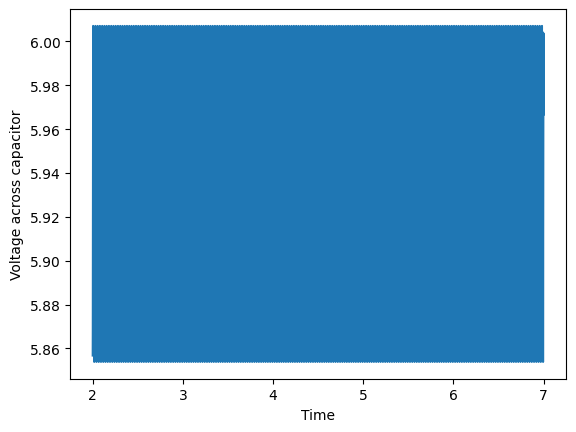

In [32]:
times = []
values = []

dont_show_calc_time = 2
show_time = 5

if iterative:
    cap_charge = 0
    volt_at_resistor = 0
    t = 0
    
    while t < dont_show_calc_time:
        volts = limited_volt(rect_volt(current_volt(t)))
        if has_capacitor:
            cap_charge = charge_capacitor(dtime, cap_charge, volts)
            volt_at_resistor = cap_charge
        else:
            volt_at_resistor = volts
        t += dtime
    
    while t < show_time + dont_show_calc_time:
        volts = limited_volt(rect_volt(current_volt(t)))
        
        if has_capacitor:
            cap_charge = charge_capacitor(dtime, cap_charge, volts)
            volt_at_resistor = cap_charge
        else:
            volt_at_resistor = volts
        values.append(volt_at_resistor)
        times.append(t)
        
        t += dtime
        
plt.plot(times, values) #marker="o"

# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Voltage across capacitor')
plt.title('')

# Display the plot
plt.show()